## Homework 2

#### Preparation

Some initializations are necessary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Apartment prices

> Läs in data i dataframe

To read data from file, it is to be noted that the delimiter is comma, " , ", so the default method may be used.<br><br>

![Upper left corner of the file opened in Jupyter](Booli_sold-csv.jpg  "'Delimiter' shows the sep parameter value to use")<br><br>

Reading data from file into dataframe.

In [2]:
apartments_df = pd.read_csv('Booli_sold.csv')

To see some more data

In [3]:
apartments_df.tail()

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
153,1495000,1388.0,26.0,1.0,2012-10-20 07:36:37,1935.0,Lägenhet,1297784,2012-11-30,1475000,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/
154,2245000,2455.0,50.0,2.0,2012-10-19 15:32:58,1935.0,Lägenhet,1296874,2012-10-27,2245000,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/
155,1450000,1072.0,23.0,1.0,2012-09-14 05:10:08,1936.0,Lägenhet,1270599,2012-10-22,1450000,...,59.371194,18.053552,NaN,Stockholm,Stockholms län,255,Notar,1566,Broker,http://www.notar.se/
156,2495000,2748.0,56.0,3.0,2012-09-21 12:19:37,1935.0,Lägenhet,1276232,2012-10-09,2200000,...,59.372759,18.054634,True,Stockholm,Stockholms län,70,Notar,1566,Broker,http://www.notar.se/
157,2300000,2455.0,50.0,2.0,2012-09-16 02:33:35,1935.0,Lägenhet,1272477,2012-10-09,2180000,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/


To see id numbers, names and data types for the columns. This is important e.g to know if a division of listPrice and livingArea is possible without a conversion of data type.

In [4]:
apartments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listPrice                         158 non-null    int64  
 1   rent                              156 non-null    float64
 2   livingArea                        157 non-null    float64
 3   rooms                             157 non-null    float64
 4   published                         158 non-null    object 
 5   constructionYear                  144 non-null    float64
 6   objectType                        158 non-null    object 
 7   booliId                           158 non-null    int64  
 8   soldDate                          158 non-null    object 
 9   soldPrice                         158 non-null    int64  
 10  soldPriceSource                   158 non-null    object 
 11  url                               158 non-null    object 
 12  floor   

1. Price per Square Meter<br>beräkna ny variabel, ppsqm

The new variable is placed as the fourth column. Values are rounded to two decimal places.

In [5]:
#apartments_extended_df = apartments_df.insert(3,'ppSqm',round(apartments_df['listPrice'] / apartments_df['livingArea'], 2 ))
apartments_df.insert(3,'ppSqm',round(apartments_df['listPrice'] / apartments_df['livingArea'], 2 ))

In [6]:
apartments_df.head()

,listPrice,rent,livingArea,ppSqm,rooms,published,constructionYear,objectType,booliId,soldDate,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
0,3995000,4467.0,73.0,54726.03,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,...,59.371033,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1,1995000,1773.0,36.0,55416.67,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,...,59.371242,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
2,5100000,3839.0,81.0,62962.96,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/
3,5495000,4483.0,107.0,51355.14,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
4,1995000,1696.0,29.0,68793.10,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,...,59.372160,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/


2. Five most expensive apartments wrt ppsqm

In [7]:
apartments_df.sort_values(by='ppSqm')

,listPrice,rent,livingArea,ppSqm,rooms,published,constructionYear,objectType,booliId,soldDate,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
130,2200000,3563.0,69.0,31884.06,2.0,2014-01-23 20:33:54,1939.0,Lägenhet,1579799,2014-02-05,...,59.371388,18.055092,True,Stockholm,Stockholms län,186,Fastighetsbyrån,1573,Broker,http://www.fastighetsbyran.se/
146,3495000,4251.0,98.0,35663.27,3.0,2013-02-22 22:16:16,1968.0,Lägenhet,1362997,2013-03-28,...,59.371047,18.058368,True,Stockholm,Stockholms län,246,Notar,1566,Broker,http://www.notar.se/
141,2495000,3530.0,69.0,36159.42,2.0,2013-05-04 01:14:18,1937.0,Lägenhet,1295930,2013-05-19,...,59.371587,18.055203,True,Stockholm,Stockholms län,184,Notar,1566,Broker,http://www.notar.se/
93,3300000,4529.0,91.0,36263.74,4.0,2015-05-07 17:48:41,1931.0,Lägenhet,1870193,2015-05-21,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Fastighetsbyrån,1573,Broker,http://www.fastighetsbyran.se/
151,2300000,2835.0,63.0,36507.94,2.0,2012-10-11 17:37:23,1969.0,Lägenhet,1290945,2013-01-18,...,59.371526,18.057338,True,Stockholm,Stockholms län,354,SkandiaMäklarna,1570,Broker,http://www.skandiamaklarna.se/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,3495000,3052.0,47.0,74361.70,2.0,2016-07-31 06:06:54,NaN,Lägenhet,2145197,2016-08-15,...,59.372253,18.053174,True,Stockholm,Stockholms län,171,Notar,1566,Broker,http://www.notar.se/
54,1795000,1374.0,23.0,78043.48,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,...,59.371966,18.055422,True,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/
50,1890000,1464.0,24.0,78750.00,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,...,59.371780,18.055270,NaN,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/
10,2295000,1743.0,29.0,79137.93,1.0,2018-05-05 04:43:36,1935.0,Lägenhet,3125674,2018-05-19,...,59.372047,18.054986,True,Stockholm,Stockholms län,136,Mäklarhuset,204,Broker,http://www.maklarhuset.se/


Show the five highest values, avoiding NaN value

In [8]:
apartments_df.sort_values(by='ppSqm', na_position='first').tail()

,listPrice,rent,livingArea,ppSqm,rooms,published,constructionYear,objectType,booliId,soldDate,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
24,2500000,1400.0,35.0,71428.57,1.0,2017-09-08 15:22:24,1936.0,Lägenhet,2405043,2017-10-06,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/
49,3495000,3052.0,47.0,74361.70,2.0,2016-07-31 06:06:54,NaN,Lägenhet,2145197,2016-08-15,...,59.372253,18.053174,True,Stockholm,Stockholms län,171,Notar,1566,Broker,http://www.notar.se/
54,1795000,1374.0,23.0,78043.48,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,...,59.371966,18.055422,True,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/
50,1890000,1464.0,24.0,78750.00,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,...,59.371780,18.055270,NaN,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/
10,2295000,1743.0,29.0,79137.93,1.0,2018-05-05 04:43:36,1935.0,Lägenhet,3125674,2018-05-19,...,59.372047,18.054986,True,Stockholm,Stockholms län,136,Mäklarhuset,204,Broker,http://www.maklarhuset.se/


Another function

In [9]:
apartments_df.nlargest(5,'ppSqm')

,listPrice,rent,livingArea,ppSqm,rooms,published,constructionYear,objectType,booliId,soldDate,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
10,2295000,1743.0,29.0,79137.93,1.0,2018-05-05 04:43:36,1935.0,Lägenhet,3125674,2018-05-19,...,59.372047,18.054986,True,Stockholm,Stockholms län,136,Mäklarhuset,204,Broker,http://www.maklarhuset.se/
50,1890000,1464.0,24.0,78750.00,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,...,59.371780,18.055270,NaN,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/
54,1795000,1374.0,23.0,78043.48,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,...,59.371966,18.055422,True,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/
49,3495000,3052.0,47.0,74361.70,2.0,2016-07-31 06:06:54,NaN,Lägenhet,2145197,2016-08-15,...,59.372253,18.053174,True,Stockholm,Stockholms län,171,Notar,1566,Broker,http://www.notar.se/
24,2500000,1400.0,35.0,71428.57,1.0,2017-09-08 15:22:24,1936.0,Lägenhet,2405043,2017-10-06,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/


3. Average ppsqm

In [10]:
average = apartments_df['ppSqm'].mean()

In [11]:
print(round(average,2))

54127.44


4. Interesting to see that ...

Gör en plot mellan ppSqm och yta

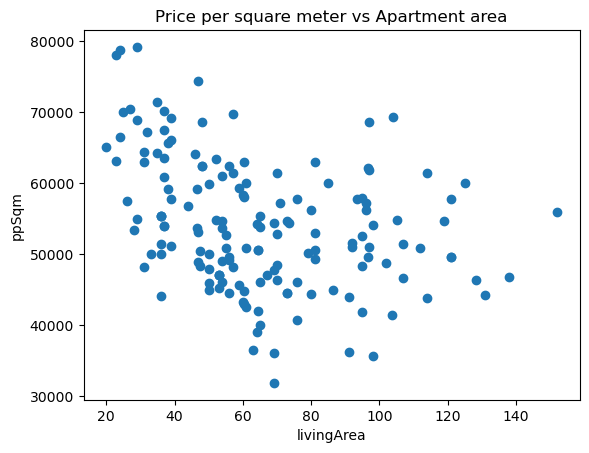

In [12]:
fig, ax = plt.subplots()
livingArea_asArray = np.asarray(apartments_df['livingArea'])
ppSqm_asArray = np.asarray(apartments_df['ppSqm'])
#ax.plot = (livingArea_asArray,ppSqm_asArray)
ax.set_title('Price per square meter vs Apartment area')
ax.set_xlabel('livingArea')
ax.set_ylabel('ppSqm')
ax.scatter('livingArea','ppSqm',data=apartments_df)
# ax.scatter(apartments_df['livingArea'],apartments_df['ppSqm'])
# ax.scatter(livingArea_asArray,ppSqm_asArray)
# plt.show()

#### Gör en dataframe av de två kolumnerna

In [13]:
livingArea_ppSqm_df = pd.DataFrame(data=apartments_df,columns=['livingArea','ppSqm'])

In [14]:
livingArea_ppSqm_df 

,livingArea,ppSqm
0,73.0,54726.03
1,36.0,55416.67
2,81.0,62962.96
3,107.0,51355.14
4,29.0,68793.10
...,...,...
153,26.0,57500.00
154,50.0,44900.00
155,23.0,63043.48
156,56.0,44553.57


In [15]:
round(livingArea_ppSqm_df.corr(),3)

,livingArea,ppSqm
livingArea,1.000,-0.353
ppSqm,-0.353,1.000


Ta bort rader med NaN, blir ingen skillnad i R, eftersom corr() tar bort NaN !!

In [16]:
livingArea_ppSqm_df_without_NaN  = livingArea_ppSqm_df.dropna(ignore_index=True) 

In [17]:
livingArea_ppSqm_df_without_NaN

,livingArea,ppSqm
0,73.0,54726.03
1,36.0,55416.67
2,81.0,62962.96
3,107.0,51355.14
4,29.0,68793.10
...,...,...
152,26.0,57500.00
153,50.0,44900.00
154,23.0,63043.48
155,56.0,44553.57


In [18]:
livingArea_ppSqm_df_without_NaN.corr()

,livingArea,ppSqm
livingArea,1.000000,-0.352784
ppSqm,-0.352784,1.000000


#### Undersök yta mindre än 70 kvm eller större

In [19]:
livingArea_ppSqm_df_lt_70_sqm_with_NaN = livingArea_ppSqm_df.where(livingArea_ppSqm_df['livingArea'] < 70)

In [20]:
livingArea_ppSqm_df_lt_70_sqm_with_NaN

,livingArea,ppSqm
0,NaN,NaN
1,36.0,55416.67
2,NaN,NaN
3,NaN,NaN
4,29.0,68793.10
...,...,...
153,26.0,57500.00
154,50.0,44900.00
155,23.0,63043.48
156,56.0,44553.57


In [21]:
livingArea_ppSqm_df_lt_70_sqm_without_NaN = livingArea_ppSqm_df_lt_70_sqm_with_NaN.dropna()

In [22]:
round(livingArea_ppSqm_df_lt_70_sqm_without_NaN.corr(),3)

,livingArea,ppSqm
livingArea,1.000,-0.605
ppSqm,-0.605,1.000


In [23]:
livingArea_ppSqm_df_gte_70_sqm = livingArea_ppSqm_df.where(livingArea_ppSqm_df['livingArea'] >= 70).dropna()

In [24]:
livingArea_ppSqm_df_gte_70_sqm

,livingArea,ppSqm
0,73.0,54726.03
2,81.0,62962.96
3,107.0,51355.14
5,125.0,59960.00
6,79.2,50189.39
9,96.0,57239.58
12,92.0,51630.43
14,97.0,68556.70
18,71.0,57183.10
20,93.4,57815.85


In [25]:
round(livingArea_ppSqm_df_gte_70_sqm.corr(),3)

,livingArea,ppSqm
livingArea,1.000,0.027
ppSqm,0.027,1.000


#### Gör en matris av de två arrayerna, blir komplicerat med NaN-värdeparen (1 eller 2 sådana par)

In [26]:
livingArea_ppSqm_matrix = np.asmatrix([livingArea_asArray,ppSqm_asArray])

In [27]:
livingArea_ppSqm_matrix.ndim

2

In [28]:
livingArea_ppSqm_matrix.shape

(2, 158)

In [29]:
livingArea_ppSqm_matrix.strides # 8*158 = 1264

(1264, 8)

In [30]:
en_obs = livingArea_ppSqm_matrix[1][0]

In [31]:
type(en_obs)

numpy.matrix

In [32]:
print(en_obs)

[[54726.03 55416.67 62962.96 51355.14 68793.1  59960.   50189.39 50544.32
  50544.32 57239.58 79137.93 53085.11 51630.43 69102.56 68556.7  56704.55
  59900.   59934.32 57183.1  64354.84 57815.85 54296.88 59322.03 66025.64
  71428.57 63513.51 62410.71 59941.18 57763.16 70135.14 59139.78 69230.77
  61804.12 54807.69 70000.   61428.57 69736.84 56250.   61018.52 68645.83
  61359.65 57692.31 55384.62 64285.71 57842.11 57809.92 63018.24 54347.83
  67432.43 74361.7  78750.   65657.89 49553.57 48500.   78043.48 70446.1
  47075.47 54030.61 51030.93 55921.05 58043.12 59210.53 60810.81 62395.83
  53024.69 54353.74 50848.21 66458.33 46739.13 58333.33 53703.7  52727.27
  51153.85 62395.83 64130.43 47014.93 52785.71 50818.18 49545.45 62047.57
  47075.47 51032.61 52578.95 49545.45 54629.63 55416.67 67187.5  50819.67
  61403.51 62903.23 43034.83 54761.9  48774.51 36263.74 63365.38 50000.
  45677.97 49074.07 55416.67 44776.12 56250.   48245.61      nan 49107.14
  51388.89 43333.33 44236.64 46375.68 438

In [33]:
tvaa_obs = livingArea_ppSqm_matrix[...,157]

In [34]:
type(tvaa_obs)

numpy.matrix

In [35]:
tvaa_obs.ndim

2

In [36]:
tvaa_obs.shape

(2, 1)

In [37]:
tvaa_obs

matrix([[   50.],
        [46000.]])

In [38]:
livingArea_ppSqm_matrix

matrix([[7.300000e+01, 3.600000e+01, 8.100000e+01, 1.070000e+02,
         2.900000e+01, 1.250000e+02, 7.920000e+01, 6.430000e+01,
         6.430000e+01, 9.600000e+01, 2.900000e+01, 4.700000e+01,
         9.200000e+01, 3.900000e+01, 9.700000e+01, 4.400000e+01,
         5.000000e+01, 6.090000e+01, 7.100000e+01, 3.100000e+01,
         9.340000e+01, 6.400000e+01, 5.900000e+01, 3.900000e+01,
         3.500000e+01, 3.700000e+01, 5.600000e+01, 8.500000e+01,
         7.600000e+01, 3.700000e+01, 4.650000e+01, 1.040000e+02,
         9.700000e+01, 5.200000e+01, 2.500000e+01, 7.000000e+01,
         5.700000e+01, 8.000000e+01, 5.400000e+01, 4.800000e+01,
         1.140000e+02, 3.900000e+01, 6.500000e+01, 3.500000e+01,
         9.500000e+01, 1.210000e+02, 6.030000e+01, 6.900000e+01,
         3.700000e+01, 4.700000e+01, 2.400000e+01, 3.800000e+01,
         5.600000e+01, 7.000000e+01, 2.300000e+01, 2.690000e+01,
         5.300000e+01, 9.800000e+01, 9.700000e+01, 1.520000e+02,
         6.030000e+01, 3.

In [39]:
np.corrcoef(livingArea_asArray,ppSqm_asArray)

array([[nan, nan],
       [nan, nan]])

In [40]:
# apartments_df['livingArea','ppSqm'].corr(method='callable')
np.corrcoef(livingArea_ppSqm_matrix)

array([[nan, nan],
       [nan, nan]])

In [41]:
livingArea_asArray 

array([ 73. ,  36. ,  81. , 107. ,  29. , 125. ,  79.2,  64.3,  64.3,
        96. ,  29. ,  47. ,  92. ,  39. ,  97. ,  44. ,  50. ,  60.9,
        71. ,  31. ,  93.4,  64. ,  59. ,  39. ,  35. ,  37. ,  56. ,
        85. ,  76. ,  37. ,  46.5, 104. ,  97. ,  52. ,  25. ,  70. ,
        57. ,  80. ,  54. ,  48. , 114. ,  39. ,  65. ,  35. ,  95. ,
       121. ,  60.3,  69. ,  37. ,  47. ,  24. ,  38. ,  56. ,  70. ,
        23. ,  26.9,  53. ,  98. ,  97. , 152. ,  60.3,  38. ,  37. ,
        48. ,  81. ,  73.5, 112. ,  24. , 138. ,  60. ,  54. ,  55. ,
        39. ,  48. ,  46. ,  67. ,  70. ,  55. , 121. ,  96.7,  53. ,
        92. ,  95. , 121. ,  54. ,  36. ,  32. ,  61. ,  57. ,  31. ,
        60.3, 105. , 102. ,  91. ,  52. ,  50. ,  59. ,  54. ,  36. ,
        60.3,  96. ,  57. ,   nan,  56. ,  36. ,  60. , 131. , 128.3,
       114. ,  37. ,  65. ,  81. ,  46.5, 119. ,  86.3,  29. ,  91. ,
        61. ,  37. , 103.8,  50. ,  65. ,  81. ,  96.7,  36. ,  28. ,
        70. ,  73. ,

In [42]:
type(livingArea_asArray)

numpy.ndarray

In [43]:
livingArea_asArray.ndim

1

In [44]:
ppSqm_asArray

array([54726.03, 55416.67, 62962.96, 51355.14, 68793.1 , 59960.  ,
       50189.39, 50544.32, 50544.32, 57239.58, 79137.93, 53085.11,
       51630.43, 69102.56, 68556.7 , 56704.55, 59900.  , 59934.32,
       57183.1 , 64354.84, 57815.85, 54296.88, 59322.03, 66025.64,
       71428.57, 63513.51, 62410.71, 59941.18, 57763.16, 70135.14,
       59139.78, 69230.77, 61804.12, 54807.69, 70000.  , 61428.57,
       69736.84, 56250.  , 61018.52, 68645.83, 61359.65, 57692.31,
       55384.62, 64285.71, 57842.11, 57809.92, 63018.24, 54347.83,
       67432.43, 74361.7 , 78750.  , 65657.89, 49553.57, 48500.  ,
       78043.48, 70446.1 , 47075.47, 54030.61, 51030.93, 55921.05,
       58043.12, 59210.53, 60810.81, 62395.83, 53024.69, 54353.74,
       50848.21, 66458.33, 46739.13, 58333.33, 53703.7 , 52727.27,
       51153.85, 62395.83, 64130.43, 47014.93, 52785.71, 50818.18,
       49545.45, 62047.57, 47075.47, 51032.61, 52578.95, 49545.45,
       54629.63, 55416.67, 67187.5 , 50819.67, 61403.51, 62903

### The Swedish Election of 2018

> Läs in data från filen 2018_R_per_kommun.csv i en data frame

To read data from file, it is to be noted that the delimiter is semi colon, " ; ", so the correct value for the sep parameter must be used. We also see that comma, " , ", is used as decimal character, which has to be given for the corresponding parameter.<br><br>

![Upper left corner of the file opened in Jupyter](2018_R_per_kommun-csv-II.jpg  "'Delimiter' shows the sep parameter value to use")<br><br>

In [45]:
R_per_kommun_df = pd.read_csv('2018_R_per_kommun.csv', sep=';', decimal=',')

To see some more data

In [46]:
R_per_kommun_df.tail()

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
285,25,80,Norrbottens län,Luleå,15.38,7.53,4.37,4.78,38.97,10.47,...,NaN,NaN,0.01,0.03,0.69,0.04,53182,53589,60185,89.04
286,25,81,Norrbottens län,Piteå,11.82,7.49,2.52,4.80,47.48,10.56,...,NaN,NaN,0.00,0.03,0.61,0.02,29523,29719,33094,89.80
287,25,82,Norrbottens län,Boden,14.32,6.23,3.61,4.61,41.76,8.10,...,NaN,NaN,0.02,0.03,0.84,0.07,19110,19291,21934,87.95
288,25,83,Norrbottens län,Haparanda,12.79,9.61,1.86,5.32,36.69,5.91,...,NaN,NaN,NaN,0.04,1.01,0.11,4402,4454,6120,72.78
289,25,84,Norrbottens län,Kiruna,10.71,5.38,2.51,4.91,38.23,13.46,...,NaN,0.05,0.02,0.16,1.09,0.05,14796,14991,17468,85.82


To get some info on the data frame structure

In [47]:
R_per_kommun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LÄNSKOD          290 non-null    int64  
 1   KOMMUNKOD        290 non-null    int64  
 2   LÄNSNAMN         290 non-null    object 
 3   KOMMUNNAMN       290 non-null    object 
 4   M                290 non-null    float64
 5   C                290 non-null    float64
 6   L                290 non-null    float64
 7   KD               290 non-null    float64
 8   S                290 non-null    float64
 9   V                290 non-null    float64
 10  MP               290 non-null    float64
 11  SD               290 non-null    float64
 12  FI               290 non-null    float64
 13  AfS              290 non-null    float64
 14  BASIP            144 non-null    float64
 15  CSIS             10 non-null     float64
 16  DD               283 non-null    float64
 17  DjuP            

1. Total Number of Legitimate Votes<br>

We have to select the municipalities in the Stockholm region and then sum all "Röster giltiga" in these municipalities.

For each municipality in Sweden, check if it is located in the Stockholm region.

In [48]:
municipalities_in_Stockholm_smarter = R_per_kommun_df.loc[R_per_kommun_df.loc[:,'LÄNSKOD'] == 1]

In [49]:
municipalities_in_Stockholm_smarter

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
0,1,14,Stockholms län,Upplands Väsby,23.11,6.26,5.66,6.71,26.97,8.01,...,NaN,NaN,NaN,0.04,0.69,0.06,25830,26036,30740,84.70
1,1,15,Stockholms län,Vallentuna,28.29,10.11,7.73,7.58,18.91,4.47,...,0.0,NaN,0.00,0.02,0.59,0.08,20952,21099,23438,90.02
2,1,17,Stockholms län,Österåker,29.68,9.35,7.48,7.13,19.71,4.97,...,NaN,NaN,0.01,0.03,0.69,0.13,27711,27947,31309,89.26
3,1,20,Stockholms län,Värmdö,27.49,9.76,6.40,5.89,20.48,6.02,...,NaN,NaN,0.01,0.04,0.67,0.07,28115,28335,31371,90.32
4,1,23,Stockholms län,Järfälla,23.96,6.31,6.04,6.29,27.68,8.75,...,0.0,NaN,0.02,0.04,0.53,0.07,45654,45948,53230,86.32
5,1,25,Stockholms län,Ekerö,28.12,11.24,7.64,7.85,17.17,4.76,...,NaN,NaN,0.01,0.01,0.64,0.08,17814,17946,19472,92.16
6,1,26,Stockholms län,Huddinge,24.07,7.52,6.14,5.35,26.10,8.63,...,NaN,NaN,0.01,0.04,0.58,0.07,61440,61869,72839,84.94
7,1,27,Stockholms län,Botkyrka,18.52,5.19,4.39,8.13,32.34,9.85,...,NaN,NaN,0.06,0.03,0.64,0.05,45393,45719,58436,78.24
8,1,28,Stockholms län,Salem,24.84,7.61,7.58,7.98,23.07,5.98,...,NaN,NaN,NaN,0.04,0.75,0.02,9985,10066,11463,87.81
9,1,36,Stockholms län,Haninge,22.94,6.06,5.11,5.36,27.29,7.99,...,0.0,NaN,0.01,0.05,0.79,0.05,50484,50940,59890,85.06


In [50]:
is_municipality_in_Stockholm = R_per_kommun_df.loc[:, 'LÄNSKOD'] == 1

The result is a Series of bool.

In [51]:
is_municipality_in_Stockholm 

0       True
1       True
2       True
3       True
4       True
       ...  
285    False
286    False
287    False
288    False
289    False
Name: LÄNSKOD, Length: 290, dtype: bool

In [52]:
type(is_municipality_in_Stockholm)

pandas.core.series.Series

This Series may be used to select the subset of the data frame that represents municipalities in Stockholm

In [53]:
municipalities_in_Stockholm = R_per_kommun_df.loc[is_municipality_in_Stockholm]

In [54]:
municipalities_in_Stockholm

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
0,1,14,Stockholms län,Upplands Väsby,23.11,6.26,5.66,6.71,26.97,8.01,...,NaN,NaN,NaN,0.04,0.69,0.06,25830,26036,30740,84.70
1,1,15,Stockholms län,Vallentuna,28.29,10.11,7.73,7.58,18.91,4.47,...,0.0,NaN,0.00,0.02,0.59,0.08,20952,21099,23438,90.02
2,1,17,Stockholms län,Österåker,29.68,9.35,7.48,7.13,19.71,4.97,...,NaN,NaN,0.01,0.03,0.69,0.13,27711,27947,31309,89.26
3,1,20,Stockholms län,Värmdö,27.49,9.76,6.40,5.89,20.48,6.02,...,NaN,NaN,0.01,0.04,0.67,0.07,28115,28335,31371,90.32
4,1,23,Stockholms län,Järfälla,23.96,6.31,6.04,6.29,27.68,8.75,...,0.0,NaN,0.02,0.04,0.53,0.07,45654,45948,53230,86.32
5,1,25,Stockholms län,Ekerö,28.12,11.24,7.64,7.85,17.17,4.76,...,NaN,NaN,0.01,0.01,0.64,0.08,17814,17946,19472,92.16
6,1,26,Stockholms län,Huddinge,24.07,7.52,6.14,5.35,26.10,8.63,...,NaN,NaN,0.01,0.04,0.58,0.07,61440,61869,72839,84.94
7,1,27,Stockholms län,Botkyrka,18.52,5.19,4.39,8.13,32.34,9.85,...,NaN,NaN,0.06,0.03,0.64,0.05,45393,45719,58436,78.24
8,1,28,Stockholms län,Salem,24.84,7.61,7.58,7.98,23.07,5.98,...,NaN,NaN,NaN,0.04,0.75,0.02,9985,10066,11463,87.81
9,1,36,Stockholms län,Haninge,22.94,6.06,5.11,5.36,27.29,7.99,...,0.0,NaN,0.01,0.05,0.79,0.05,50484,50940,59890,85.06


Now, the number of valid votes may be computed by summing the numbers in the column "RÖSTER GILTIGA", column number 41.

In [55]:
validVotes = municipalities_in_Stockholm.iloc[:,41].sum()

In [56]:
print(validVotes)

1426237


Another way to compute this number is 

In [57]:
validVotesAlt = municipalities_in_Stockholm.loc[:, "RÖSTER GILTIGA"].sum()

In [58]:
print(validVotesAlt)

1426237


2. In Which Municipality did the Social Democratic Party Get the Highest Voting Percent?<Br>

First we sort all municipalities in descending order by the percent of votes for the social democratic party, and show top 5.

In [59]:
R_per_kommun_df.sort_values(by="S",ascending=False).head()

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
188,17,62,Värmlands län,Munkfors,8.33,8.12,2.91,3.93,52.18,6.11,...,NaN,NaN,NaN,NaN,1.02,NaN,2340,2364,2777,85.13
286,25,81,Norrbottens län,Piteå,11.82,7.49,2.52,4.80,47.48,10.56,...,NaN,NaN,0.00,0.03,0.61,0.02,29523,29719,33094,89.80
196,17,83,Värmlands län,Hagfors,9.27,7.86,2.33,4.51,47.46,8.27,...,NaN,NaN,NaN,NaN,0.94,0.03,7607,7681,9134,84.09
279,25,13,Norrbottens län,Överkalix,7.81,8.79,2.10,3.44,46.68,10.49,...,NaN,NaN,0.04,NaN,1.28,NaN,2241,2270,2667,85.11
280,25,14,Norrbottens län,Kalix,11.71,6.42,2.87,3.58,45.37,7.88,...,NaN,NaN,NaN,0.06,1.16,0.04,10971,11111,12765,87.04


We then choose the name of the first municipality

In [60]:
R_per_kommun_df.sort_values(by="S",ascending=False).iloc[0,3]

'Munkfors'

In [61]:
R_per_kommun_df['S'].max()

np.float64(52.18)

3. Top 3 Municipalities on Highest Participation

In [62]:
R_per_kommun_df.sort_values(by="VALDELTAGANDE",ascending=False).iloc[0:3,[3,44]]

,KOMMUNNAMN,VALDELTAGANDE
103,Lomma,93.86
59,Habo,93.35
98,Vellinge,93.13


In [63]:
R_per_kommun_df.sort_values(by="VALDELTAGANDE",ascending=False).iloc[0:3,:]

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
103,12,62,Skåne län,Lomma,33.16,9.33,9.97,6.38,16.69,2.54,...,NaN,NaN,NaN,NaN,0.51,0.04,16401,16492,17570,93.86
59,6,43,Jönköpings län,Habo,19.73,8.77,4.22,15.13,23.74,3.91,...,NaN,NaN,NaN,0.06,0.88,0.06,7746,7825,8382,93.35
98,12,33,Skåne län,Vellinge,39.56,7.24,7.26,7.45,10.58,1.31,...,0.0,NaN,NaN,0.02,0.40,0.04,25245,25360,27231,93.13


### Predicting Strokes

> Läs in data från filen ... i en data frame

To read data from file, it is to be noted that the delimiter is comma, " , ", so the default method may be used.<br><br>

![Upper left corner of the file opened in Jupyter](stroke-data-csv.jpg  "'Delimiter' shows the sep parameter value to use")<br><br>

In [64]:
stroke_data_df = pd.read_csv('stroke-data.csv')

In [65]:
stroke_data_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##### An Interesting Conclusion From the Data

> undersök tex samband mellan ålder och stroke, och mellan ålder, en variabel till ( tex blodtryck, diabetes, rökning) och stroke. visa i en plot

make plot wider, to täcka hela bredden, slumpa ett värde i höjdled, +-0.1 tex, ta bara med stroke=1

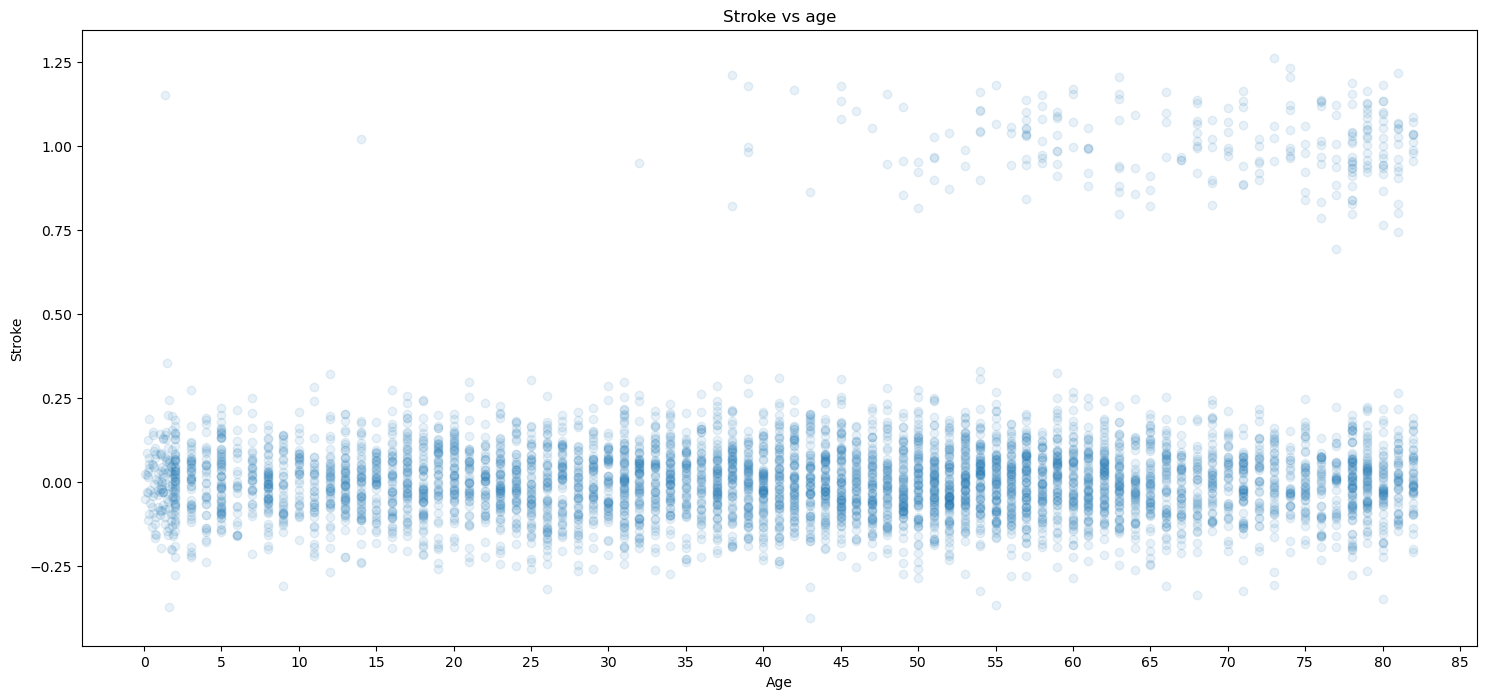

In [67]:
#plt.rcParams['text.usetex'] = True   # to be able to use LaTex

fig, ax = plt.subplots(figsize=(18,8))
# livingArea_asArray = np.asarray(apartments_df['livingArea'])
# ppSqm_asArray = np.asarray(apartments_df['ppSqm'])
#ax.plot = (livingArea_asArray,ppSqm_asArray)
#ax.scatter(livingArea_asArray,ppSqm_asArray)
ax.set_title('Stroke vs age')
ax.set_ylabel('Stroke')
ax.set_xlabel('Age')
# ax.legend("Stroke: 1 +- 3 s.d. i.e. 0.75 ... 1,25", "No stroke: 0 +- 3 s.d. i.e. -0.25 ... 0,25", loc=(0.2, 0.5))
ax.set_xticks(np.arange(0,90,5))
rng = np.random.default_rng()
noisy_stroke = np.asarray(stroke_data_df['stroke']) + 0.1 * rng.standard_normal(5110)  
ax.scatter(np.asarray(stroke_data_df['age']),noisy_stroke, alpha=0.1)
# ax.scatter(np.asarray(stroke_data_df['age']),np.asarray(stroke_data_df['stroke']) + , alpha=0.1)
# ax.scatter('age', 'stroke', data= stroke_data_df, alpha=0.1)
# plt.show()
#plt.rcParams['text.usetex'] = False   # to be able to not use LaTex